# Jupyter notebook to test MLFF models 

In [9]:
import inference_functions as ifs
import importlib
import pandas as pd

In [10]:
importlib.reload(ifs)

<module 'inference_functions' from '/mnt/e/Documents/GitHub/MLFF_training/Inference/inference_functions.py'>

## Runs Inference for Mace and Chgnet

### Parse test set

In [11]:
filepath = '/home/nacho/NbOC/vasp/test_set/finished_calcs/'
atoms_list,opt_atoms_list = ifs.read_dft(filepath)


Processing:   0%|                                                                                                                                                                                                                                                | 0/16 [00:00<?, ?it/s]

Error reading file: /home/nacho/NbOC/vasp/test_set/finished_calcs/test/OUTCAR
Error details: [Errno 2] No such file or directory: '/home/nacho/NbOC/vasp/test_set/finished_calcs/test/OUTCAR'


Processing: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  4.97it/s]


### Run inference using MLFF

In [12]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar',calc_correlation=True)


Running CHgnet


In [13]:
df_0407

,File,DFT E,MLFF E,ΔE,DFT Forces,MLFF Forces,Forces MSE,natom,DFT Rank,MLFF Rank
0,struct5_natom4,-7.818,-8.301,0.483,-8.333333e-08,1.490116e-08,0.398,4,1,1
1,struct1_natom4,-7.743,-8.301,0.558,0.000000e+00,-1.893689e-08,0.000,4,2,1
2,struct3_natom4,-6.854,-7.546,0.692,0.000000e+00,-7.947286e-08,1.682,4,5,3
3,struct2_natom4,-6.824,-6.876,0.052,0.000000e+00,-2.360927e-08,0.000,4,6,6
4,struct4_natom4,-5.824,-6.425,0.601,0.000000e+00,-1.940837e-07,0.000,4,9,9
5,struct3_natom16,-6.967,-7.531,0.564,0.000000e+00,2.296444e-08,0.000,16,3,4
6,struct2_natom16,-6.870,-7.121,0.252,0.000000e+00,0.000000e+00,0.096,16,4,5
7,struct5_natom16,-6.510,-6.874,0.364,0.000000e+00,2.483527e-08,1.269,16,7,7
8,struct4_natom16,-6.418,-6.571,0.153,0.000000e+00,-1.986822e-08,0.428,16,8,8
9,struct1_natom16,-1.943,-3.471,1.528,0.000000e+00,-7.947286e-08,15.250,16,15,15


In [17]:
df_0407= ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-07-2024/bestE_epoch38_e888_f7250_s3257_mNA.pth.tar',calc_correlation=True)
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar',calc_correlation=True)
df_0429 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar')
df_0529 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/relaxed_052924-290524.p/bestE_epoch26_e383_f495_s1317_mNA.pth.tar',calc_correlation=True)
df_0415 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/04-15-2024/bestE_epoch34_e114_f323_s1109_mNA.pth.tar')
df_long68 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/long_68_aimd-120524/bestE_epoch20_e2_f52_s37_mNA.pth.tar',calc_correlation=True)
df_long0526 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/data_052624_mixed-290524.p/bestE_epoch28_e56_f272_s755_mNA.pth.tar',calc_correlation=True)
df_all = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_AIMD_52424-240524.p/bestE_epoch32_e4_f87_s330_mNA.pth.tar',calc_correlation=True)
df_061024 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/all_data_060924-090624.p/bestE_epoch43_e82_f300_s1347_mNA.pth.tar',calc_correlation=True)
df_binary = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar',calc_correlation=True)
df_mace = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model',mace_flag=True,calc_correlation=True)
df_mace_small = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/L0-small.model',mace_flag=True,calc_correlation=True)
df_clean_relaxed = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/MACE/clean_relaxed.model',mace_flag=True,calc_correlation=True)
all_data_1 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar',calc_correlation=True)
all_data_2 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar',calc_correlation=True)
all_data_3 = ifs.inference(atoms_list,opt_atoms_list,'/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar',calc_correlation=True )       

Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running CHgnet
Running MACE
Running MACE
Running MACE
Running CHgnet
Running CHgnet
Running CHgnet


## Example of a MLFF model Dataframe 

In [18]:
all_data_1

,File,DFT E,MLFF E,ΔE,DFT Forces,MLFF Forces,Forces MSE,natom,DFT Rank,MLFF Rank
0,struct5_natom4,-7.818,-8.282,0.464,-8.333333e-08,4.470348e-08,0.040,4,1,1
1,struct1_natom4,-7.743,-8.195,0.452,0.000000e+00,8.731149e-09,0.060,4,2,2
2,struct3_natom4,-6.854,-7.403,0.549,0.000000e+00,-3.973643e-08,0.871,4,5,4
3,struct2_natom4,-6.824,-7.039,0.214,0.000000e+00,-9.873399e-09,0.000,4,6,6
4,struct4_natom4,-5.824,-6.511,0.687,0.000000e+00,1.133109e-08,0.000,4,9,9
5,struct3_natom16,-6.967,-7.412,0.446,0.000000e+00,2.500443e-08,0.000,16,3,3
6,struct2_natom16,-6.870,-7.119,0.249,0.000000e+00,9.934108e-09,0.097,16,4,5
7,struct5_natom16,-6.510,-6.857,0.347,0.000000e+00,0.000000e+00,0.425,16,7,7
8,struct4_natom16,-6.418,-6.694,0.276,0.000000e+00,0.000000e+00,0.035,16,8,8
9,struct1_natom16,-1.943,-3.086,1.143,0.000000e+00,-2.781550e-07,1.638,16,15,15


## Graphs comparing inference on a test set

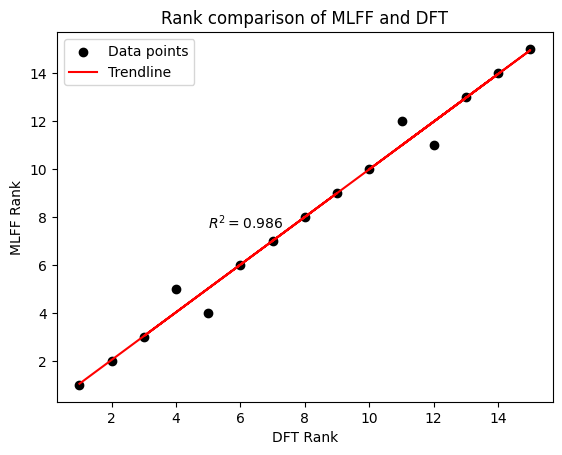

In [19]:
ifs.plot_mlff_dft_rank(all_data_1)

In [20]:
dataframes = [df_0407,df_0415,df_0429,df_0529,df_0415,df_long68,df_long0526,df_061024,df_mace,df_mace_small,df_clean_relaxed,all_data_1,all_data_2,all_data_3]
dataframe_names = ['April 4th', 'April 15th','April 29th', 'May 29th','AIMD','May 26 mixed','All AIMD','June 10th','First Mace model','Mace small','Clean relaxed MACE','All data 1','All data 2','All data 3']

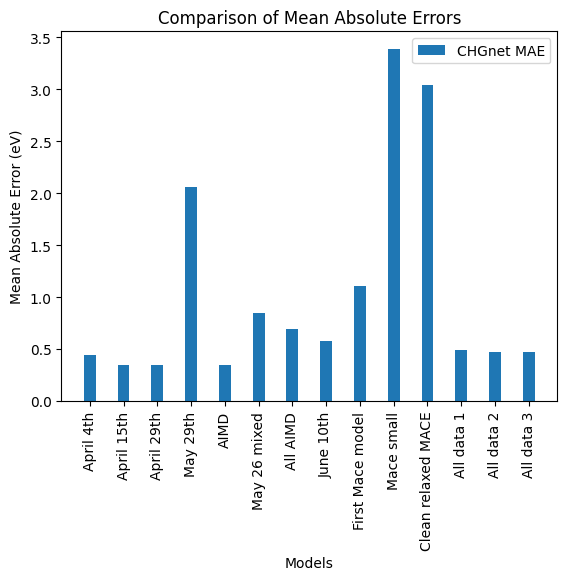

In [21]:
ifs.plot_mae_comparison(dataframes,dataframe_names)

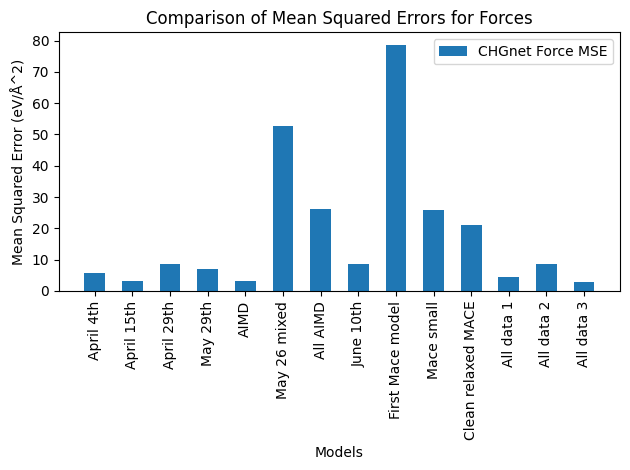

In [22]:
ifs.plot_mse_comparison(dataframes,dataframe_names)

## Running Geometry optimization with Chgnet

### June 21st model on natoms64 NbOC

CHGNet v0.3.0 initialized with 412,525 parameters
CHGNet will run on cpu
MLFF vs DFT comparison:
Volume: MLFF = 1266.693, DFT = 935.184, Difference (DFT - MLFF) = -331.509
Distance between atoms 0 and 1: MLFF = 5.728, DFT = 5.193, Difference (DFT - MLFF) = -0.535
Lattice parameters a: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters b: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168
Lattice parameters c: MLFF = 12.145, DFT = 10.977, Difference (DFT - MLFF) = -1.168


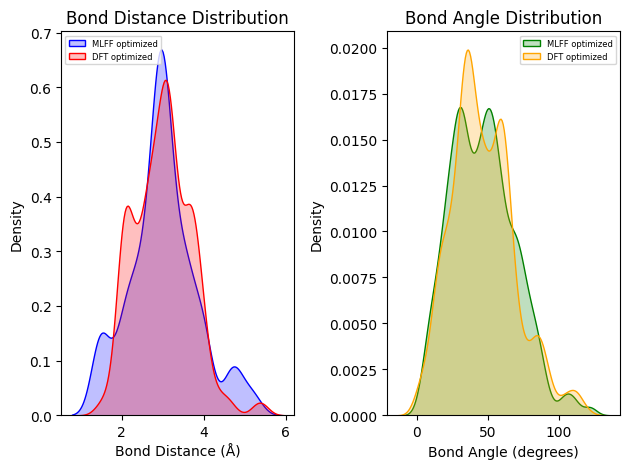

In [27]:
model_path = '/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/vasp/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [28]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th model on natoms64 NbOC 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.optimization_summary(struct,last_struct)
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

### June 10th , binary AIMD data

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestE_epoch28_e74_f276_s1343_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.plot_bond_distributions(struct,last_struct)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### June 10th binary, best forces model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/all_data_binary_061024-110624.p/bestF_epoch26_e75_f275_s1335_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

### 04/29 Model 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/04-29-2024/bestE_epoch40_e54_f723_s1061_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'

traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)

In [ ]:
ifs.visualize_trajectory(traj,struct,dft_energy)

In [ ]:
ifs.optimization_summary(struct,last_struct)

### Only binary oxides trained. 

In [ ]:
model_path = '/home/nacho/NbOC/CHGnet/binary_061024-100624.p/bestE_epoch45_e5_f87_s170_mNA.pth.tar'
outcar_path = '/home/nacho/NbOC/binary/NbO_OUTCAR_1/OUTCAR'
traj,struct,last_struct,dft_energy = ifs.optimize(model_path,outcar_path,verbose=False,fmax=0.05)
ifs.visualize_trajectory(traj,struct,dft_energy)
ifs.optimization_summary(struct,last_struct)

## MACE optimization 

In [ ]:
model_path = '/home/nacho/NbOC/MACE/2024-01-07-mace-128-L2_epoch-199.model'
outcar_path = '/home/nacho/NbOC/VASP/test_set/finished_calcs/struct3_natom64/OUTCAR'
opt_struct,dft_struct = ifs.mace_optimize(model_path,outcar_path,fmax=.001)

In [ ]:
ifs.plot_bond_distributions(opt_struct,dft_struct)
ifs.optimization_summary(opt_struct,dft_struct)

## Active Learning: Testing the variance of models.

In [34]:
import os 

model1 = dir + 'all_data_binary_061024-1706241.p/bestE_epoch26_e74_f281_s1351_mNA.pth.tar'
model2 = dir + 'all_data_binary_061024-1706242.p/bestE_epoch49_e75_f279_s1289_mNA.pth.tar'
model3 = dir + 'all_data_binary_061024-1706243.p/bestE_epoch36_e73_f275_s1306_mNA.pth.tar'

stds_old = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_old.append(std)
    print(file,std)

TypeError: unsupported operand type(s) for +: 'builtin_function_or_method' and 'str'

In [35]:
model1='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-35/bestE_epoch44_e69_f271_s1361_mNA.pth.tar'
model2='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-37/bestE_epoch28_e71_f276_s1349_mNA.pth.tar'
model3='/home/nacho/NbOC/CHGnet/2024-06-21_20-04-42/bestE_epoch37_e70_f813_s1407_mNA.pth.tar'

stds_new = []
files = []
dirs = '/home/nacho/NbOC/VASP/test_set/finished_calcs/'
for file in os.listdir(dirs):
    outcar = dirs + file + '/POSCAR'
    energy,std = ifs.energy_variance(outcar,model1,model2,model3)
    stds_new.append(std)
    files.append(file)
    print(file,std)

FileNotFoundError: [Errno 2] No such file or directory: '/home/nacho/NbOC/VASP/test_set/finished_calcs/'

In [36]:
len(stds_old)

NameError: name 'stds_old' is not defined

In [37]:
# X-axis labels
# X-axis labels


std_devs_1 = stds_new
std_devs_2 = stds_old

x_labels = ['struct1_natom4', 'test', 'struct5_natom256', 'struct4_natom16', 'struct5_natom4', 
            'struct2_natom16', 'struct2_natom64', 'struct3_natom256', 'struct4_natom256', 
            'struct4_natom4', 'struct1_natom16', 'struct2_natom4', 'struct3_natom16', 
            'struct3_natom4', 'struct3_natom64', 'struct5_natom16']

x_labels = files

# Indices for the x-axis
indices = np.arange(len(std_devs_1))

# Bar width
bar_width = 0.35

# Plotting
plt.figure(figsize=(14, 7))
plt.bar(indices - bar_width/2, std_devs_1, bar_width, label='New Model', color='b')
plt.bar(indices + bar_width/2, std_devs_2, bar_width, label='Old Model', color='r')

# Adding titles and labels
plt.title('Comparison of Standard Deviations of Models in the inference of data')
plt.xlabel('Structure')
plt.ylabel('Standard Deviation')
plt.xticks(indices, x_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

NameError: name 'stds_old' is not defined